<p style="text-align: center; font-size: 30px;">ANEXO</p>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Avisos
import warnings
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv("heloc.csv")
df = df.replace({'Bad' : 1 , 'Good' : 0})

# 1. Importancia de las columnas con valores especiales

#### Debido a que varias columnas contienen una gran proporción de valores especiales estudiamos cuál es su relevancia para el modelo que vamos a utilzar y saber así si las podremos descartar. Para ello nos quedaremos solo con las filas con valores positivos para hacernos una idea de cuán importantes pueden ser.

In [50]:
df.iloc[:,1:]

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,55,144,4,84,20,3,0,83,2,3,...,43,0,0,0,33,-8,8,1,1,69
1,61,58,15,41,2,4,4,100,-7,0,...,67,0,0,0,0,-8,0,-8,-8,0
2,67,66,5,24,9,0,0,100,-7,7,...,44,0,4,4,53,66,4,2,1,86
3,66,169,1,73,28,1,1,93,76,6,...,57,0,5,4,72,83,6,4,3,91
4,81,333,27,132,12,0,0,100,-7,7,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10454,73,131,5,57,21,0,0,95,80,6,...,19,7,0,0,26,-8,5,2,0,100
10455,65,147,39,68,11,0,0,92,28,6,...,42,1,1,1,86,53,2,2,1,80
10456,74,129,6,64,18,1,1,100,-7,6,...,33,3,4,4,6,-8,5,-8,0,56
10457,72,234,12,113,42,2,2,96,35,6,...,20,6,0,0,19,-8,4,1,0,38


In [59]:
df_positivos = df.loc[(df >= 0).all(axis=1)]

In [6]:
resto_casos = df[~(df.iloc[:, 1:] <= 0).all(axis=1)]

filas_con_valores_esp = resto_casos[(resto_casos.iloc[:, 1:].apply(lambda row: any(row < 0), axis=1))]

In [7]:
num_val_esp = filas_con_valores_esp.iloc[: , 1:].applymap(lambda x: x < 0).sum().to_frame(name= "num_valores_esp").sort_values(by= "num_valores_esp", ascending= False)
num_val_esp[num_val_esp["num_valores_esp"] > 0]

,num_valores_esp
MSinceMostRecentDelq,4840
NetFractionInstallBurden,3419
MSinceMostRecentInqexcl7days,2331
NumInstallTradesWBalance,861
NumBank2NatlTradesWHighUtilization,583
MSinceOldestTradeOpen,239
NetFractionRevolvingBurden,186
NumRevolvingTradesWBalance,156
PercentTradesWBalance,18
ExternalRiskEstimate,10


In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

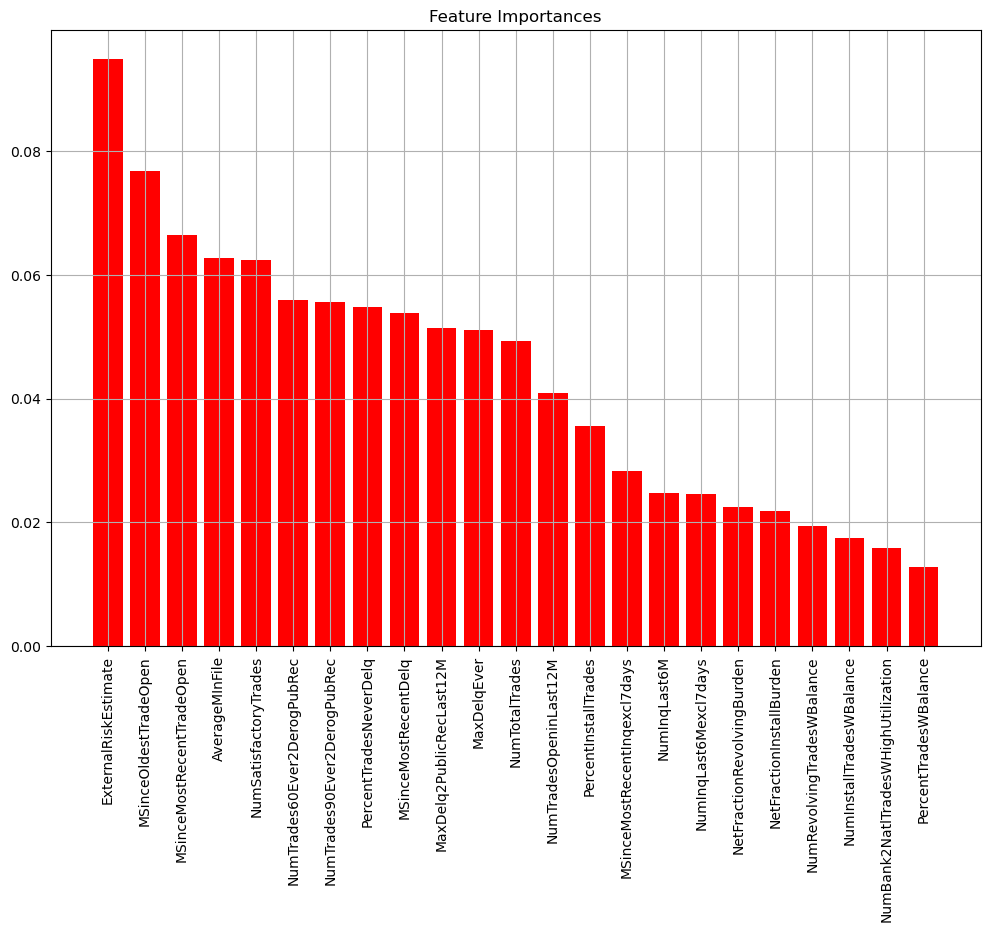

In [66]:
X = df_positivos.drop(["RiskPerformance"], axis=1)
y = df_positivos["RiskPerformance"]

model = RandomForestClassifier(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

columns_plot = list()

for f in range(X.shape[1]):
    
    feature = indices[f]
    importancia = importances[indices[f]]
    column_name = X.columns[f]
    
    columns_plot.append(column_name)
    
plt.figure(figsize = (12, 8))

plt.title("Feature Importances")

plt.bar(range(X.shape[1]), importances[indices], color = "r", align = "center")
plt.xticks(range(X.shape[1]), columns_plot, rotation = 90)

# plt.xlim([-1, X.shape[1]])
plt.grid()
plt.show()

#### Vemos que las columnas que tienen muchos datos especiales son importantes para el modelo, por lo que obtaremos por otras técnicas para salvaguardar la información

# 2. Creacion de columnas boleanas para cada valor especial

In [5]:
def col_datos_esp(df, columnas):
    
    for col in columnas:
        
        df[f"{col}_-9"] = df[col].apply(lambda x:x == -9)
        df[f"{col}_-8"] = df[col].apply(lambda x: x == -8)
        df[f"{col}_-7"] = df[col].apply(lambda x: x == -7)
        
    return df

In [6]:
resto_casos = df[~(df.iloc[:, 1:] <= 0).all(axis=1)]

filas_con_valores_esp = resto_casos[(resto_casos.iloc[:, 1:].apply(lambda row: any(row < 0), axis=1))]

In [7]:
num_val_esp = filas_con_valores_esp.iloc[: , 1:].applymap(lambda x: x < 0).sum().to_frame(name= "num_valores_esp").sort_values(by= "num_valores_esp", ascending= False)
num_val_esp[num_val_esp["num_valores_esp"] > 0]

,num_valores_esp
MSinceMostRecentDelq,4840
NetFractionInstallBurden,3419
MSinceMostRecentInqexcl7days,2331
NumInstallTradesWBalance,861
NumBank2NatlTradesWHighUtilization,583
MSinceOldestTradeOpen,239
NetFractionRevolvingBurden,186
NumRevolvingTradesWBalance,156
PercentTradesWBalance,18
ExternalRiskEstimate,10


In [8]:
num_val_esp[num_val_esp["num_valores_esp"] > 0].index

Index(['MSinceMostRecentDelq', 'NetFractionInstallBurden',
       'MSinceMostRecentInqexcl7days', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'MSinceOldestTradeOpen',
       'NetFractionRevolvingBurden', 'NumRevolvingTradesWBalance',
       'PercentTradesWBalance', 'ExternalRiskEstimate'],
      dtype='object')

In [9]:
cols = num_val_esp[num_val_esp["num_valores_esp"] > 0].index
nuevo_df = col_datos_esp(df, cols)
df_temp = nuevo_df.select_dtypes(include = bool)
df_temp["RiskPerformance"] = df["RiskPerformance"].apply(lambda x: 1 if x == "Bad" else 0)

In [10]:
cols_desbalanceadas = ["MSinceMostRecentDelq_-7", "MSinceMostRecentInqexcl7days_-8", "NumBank2NatlTradesWHighUtilization_-8", "NetFractionRevolvingBurden_-8", "NumRevolvingTradesWBalance_-8", "PercentTradesWBalance_-8", "suma_negs"]

In [11]:
for col in df_temp.columns:
    print(df_temp.groupby(by= col)["RiskPerformance"].value_counts(normalize= True), df_temp[col].value_counts())
    print("-----------------------------------------------\n")

MSinceMostRecentDelq_-9  RiskPerformance
False                    1                  0.520312
                         0                  0.479688
True                     1                  0.549320
                         0                  0.450680
Name: RiskPerformance, dtype: float64 False    9871
True      588
Name: MSinceMostRecentDelq_-9, dtype: int64
-----------------------------------------------

MSinceMostRecentDelq_-8  RiskPerformance
False                    1                  0.520762
                         0                  0.479238
True                     1                  0.590909
                         0                  0.409091
Name: RiskPerformance, dtype: float64 False    10283
True       176
Name: MSinceMostRecentDelq_-8, dtype: int64
-----------------------------------------------

MSinceMostRecentDelq_-7  RiskPerformance
False                    1                  0.621053
                         0                  0.378947
True                     0 

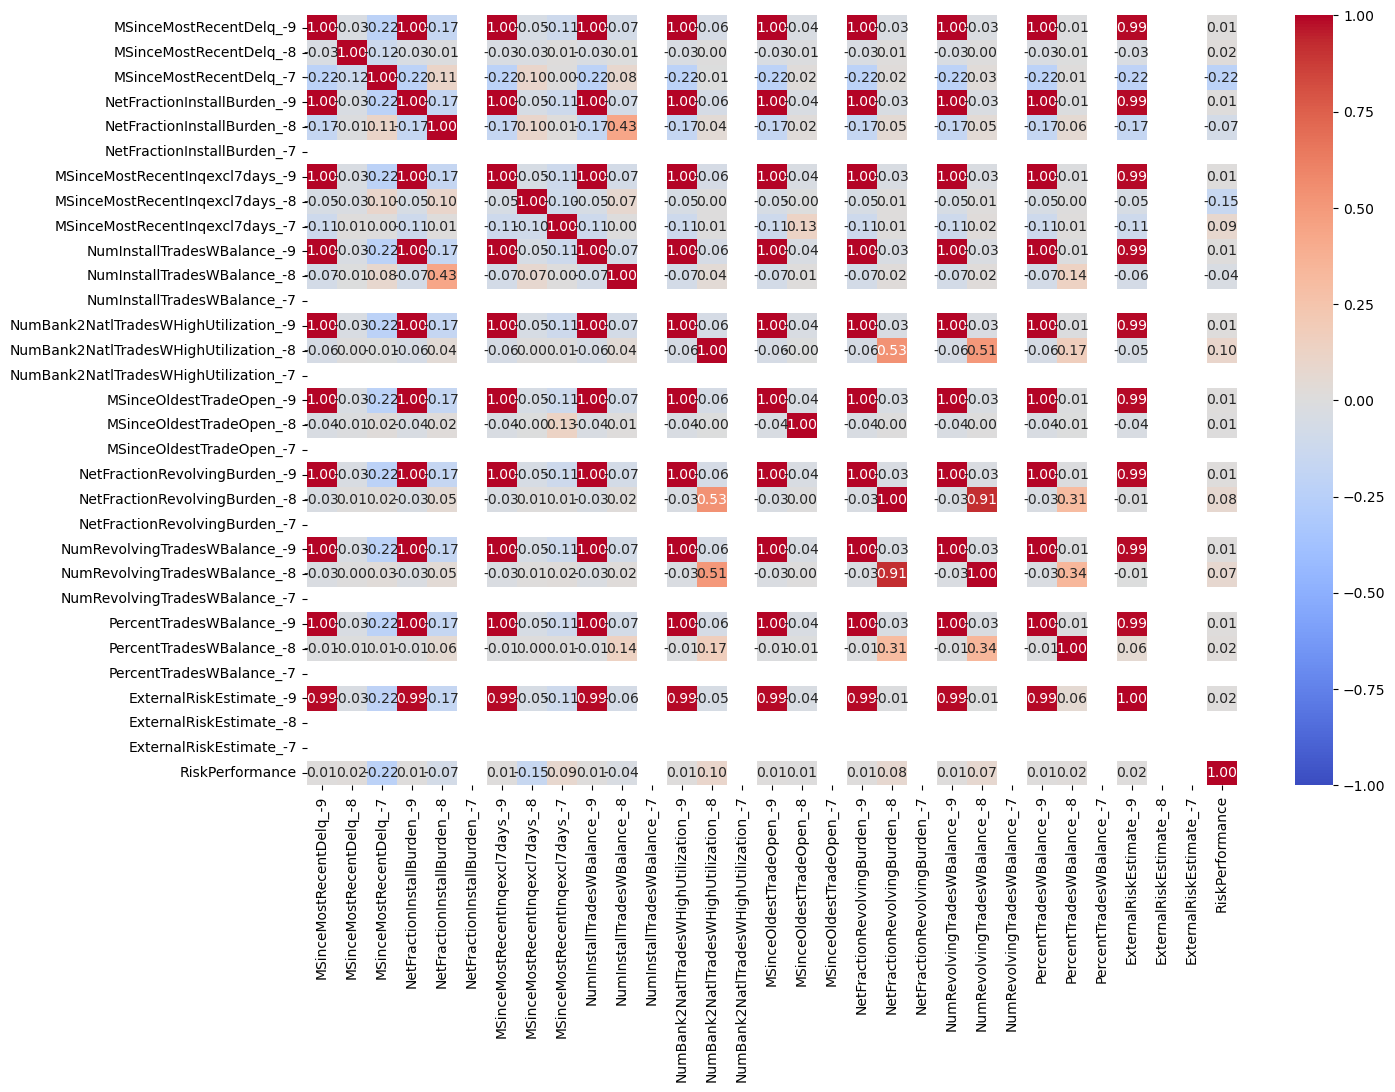

In [12]:
plt.figure(figsize = (15,10))
sns.heatmap(df_temp.corr(), vmin = -1, vmax = 1, annot = True, cmap= "coolwarm", fmt='.2f')
plt.show()

In [13]:
df_temp["suma_negs"] = df_temp[df_temp.columns[:-1]].sum(axis = 1)
df_temp.groupby(by= "suma_negs")["RiskPerformance"].value_counts()

suma_negs  RiskPerformance
0          1                  1560
           0                   942
1          1                  1985
           0                  1878
2          0                  1216
           1                  1025
3          0                   535
           1                   371
4          0                   140
           1                   131
5          1                    42
           0                    17
6          1                     8
           0                     4
7          1                     7
           0                     2
8          1                     5
           0                     1
9          1                     2
10         1                   323
           0                   265
Name: RiskPerformance, dtype: int64

In [14]:
df_temp.groupby(by= col)["RiskPerformance"].value_counts(normalize= True)

RiskPerformance  RiskPerformance
0                0                  1.0
1                1                  1.0
Name: RiskPerformance, dtype: float64

# 3. Creacion de una columna boleana para categorizar si los valores de la columna 'MSinceMostRecentDelq' son positivos o negativos

In [69]:
df = pd.read_csv("heloc.csv")
df = df.replace({'Bad' : 1 , 'Good' : 0})

In [70]:
df['MSinceMostRecentDelq_negative'] = df['MSinceMostRecentDelq'].apply(lambda x : x < 0)

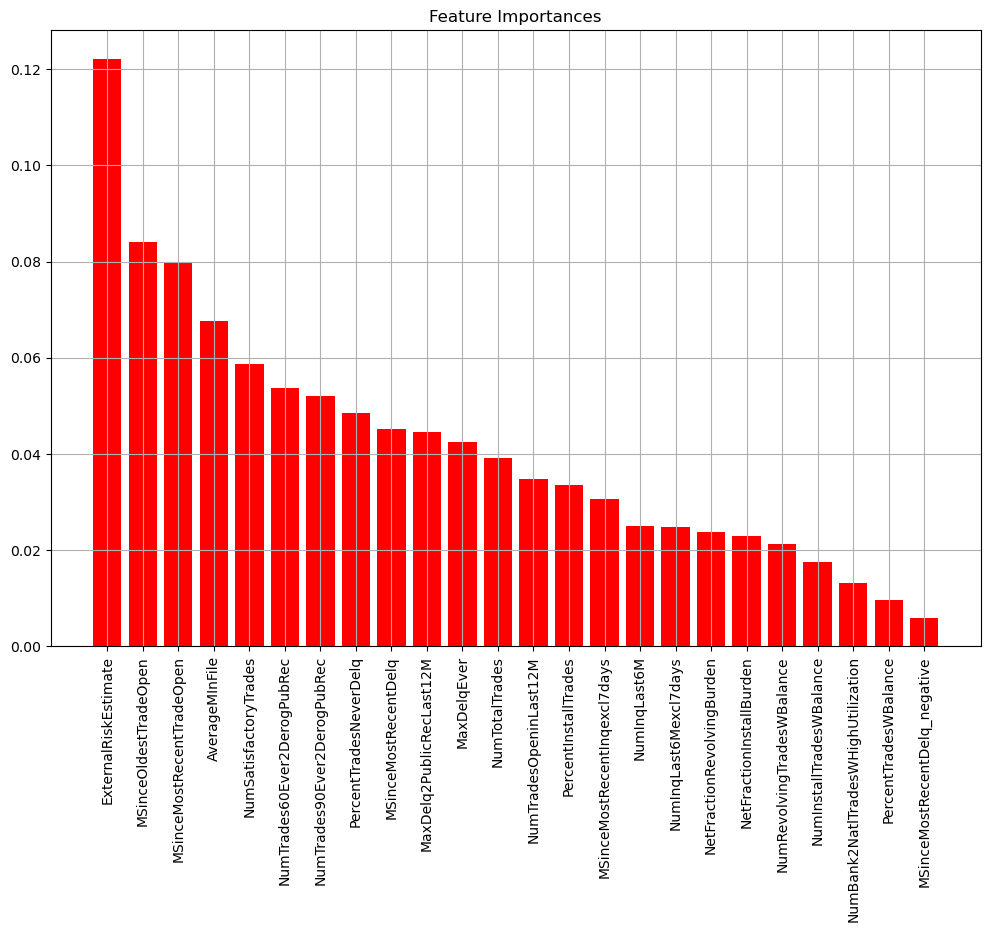

In [72]:
X = df.drop(["RiskPerformance"], axis=1)
y = df["RiskPerformance"]

model = RandomForestClassifier(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

indices = np.argsort(importances)[::-1]

columns_plot = list()

for f in range(X.shape[1]):
    
    feature = indices[f]
    importancia = importances[indices[f]]
    column_name = X.columns[f]
    
    columns_plot.append(column_name)
    
plt.figure(figsize = (12, 8))

plt.title("Feature Importances")

plt.bar(range(X.shape[1]), importances[indices], color = "r", align = "center")
plt.xticks(range(X.shape[1]), columns_plot, rotation = 90)

# plt.xlim([-1, X.shape[1]])
plt.grid()
plt.show()

#### Vemos que la nueva columna creada no es muy importante para el modelo, por lo que descartamos esta idea.

# 4. Creacion de una columna boleana para categorizar si algún valor de la fila ha sido imputado para las 3 columnas con más valores especiales

In [91]:
df = pd.read_csv("heloc.csv")
df = df.replace({'Bad' : 1 , 'Good' : 0})

In [92]:
df['MSinceMostRecentDelq_imputed'] = df['MSinceMostRecentDelq'].apply(lambda x : x<0)
df['NetFractionInstallBurden_imputed'] = df['NetFractionInstallBurden'].apply(lambda x : x<0)
df['MSinceMostRecentInqexcl7days_imputed'] = df['MSinceMostRecentInqexcl7days'].apply(lambda x : x<0)

In [93]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.impute import KNNImputer

In [94]:
imputer = KNNImputer(n_neighbors = 5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop(["RiskPerformance"], axis=1)
y = df_imputed["RiskPerformance"]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (8367, 26), y_train: (8367,)
X_test: (2092, 26), y_test: (2092,)


In [96]:
#Modelo con las columnas

model = RandomForestClassifier(random_state = 42)

model.fit(X_train, y_train)

yhat = model.predict(X_test)

acc = accuracy_score(y_test, yhat)
pre = precision_score(y_test, yhat)
rec = recall_score(y_test, yhat)
print(f'Accuracy: {acc}')
print(f'Precision: {pre}')
print(f'Recall: {rec}')

Accuracy: 0.7189292543021033
Precision: 0.711764705882353
Recall: 0.7756410256410257


In [97]:
#Modelo sin las columnas
X_train, X_test = X_train.drop(['MSinceMostRecentDelq_imputed', 'NetFractionInstallBurden_imputed', 'MSinceMostRecentInqexcl7days_imputed'], axis = 1), X_test.drop(['MSinceMostRecentDelq_imputed', 'NetFractionInstallBurden_imputed', 'MSinceMostRecentInqexcl7days_imputed'], axis = 1)

model = RandomForestClassifier(random_state = 42)

model.fit(X_train, y_train)

yhat = model.predict(X_test)

acc = accuracy_score(y_test, yhat)
pre = precision_score(y_test, yhat)
rec = recall_score(y_test, yhat)
print(f'Accuracy: {acc}')
print(f'Precision: {pre}')
print(f'Recall: {rec}')

Accuracy: 0.72131931166348
Precision: 0.7144060657118787
Recall: 0.7765567765567766


#### Vemos que no varían mucho las métricas por lo que descartamos también esta estrategia